In [2]:
#connecting to mongo client
import json
import pymongo
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/')
print(client.address, "Port =", client.PORT, "Host =", client.HOST, client.next)
#run this to have greetings


None Port = 27017 Host = localhost <bound method MongoClient.__next__ of MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)>


In [8]:
#listing all the collections in the  mongo database
dbs = client.list_database_names()
[db for db in dbs]

['admin', 'config', 'local', 'salesdb']

In [9]:
#% Now let's create a new database called salesdb
mydb = client["salesdb"]


In [10]:
#let's check if the database  is added into the mongoDb cluster
dblist = client.list_database_names()
if "salesdb" in dblist:
    print("The database exists.")
else:
    print("the database isn't added")

The database exists.


In [11]:
import os
import numpy as np
import seaborn as sns
import warnings
import  pandas as pd
from scipy import stats
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.style.use('fivethirtyeight')
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 30)

print("setup-complete!")

setup-complete!


In [12]:
!pip install warnings
!pip install seaborn
!pip install matplotlib
!pip install statsmodels
!pip install statsmodels
!pip install IPython


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [13]:
mycollection = mydb["sales"]


In [14]:
#checking the collection names
addedCollection = mydb.list_collection_names()
if "sales" in addedCollection:
    print("Hey don't  WORRY movies  Collection is added successfully")
else:
    print("It seems like your collection hasn't been added")


Hey don't  WORRY movies  Collection is added successfully


In [15]:
#create a new collections in mongodb database sales db
customersCollection = mydb["customers"]
ordersCollection = mydb["orders"]
productsCollection = mydb["products"]
allCollections=mydb.list_collection_names()
[collection for collection in allCollections]

['sales']

Reading the data from cvs files

In [16]:
import pandas as pd
# Accommodate raw path to variables
raw_customer, raw_orders = "datasets/customers.csv", "datasets/orders.csv"
raw_products, raw_sales = "datasets/products.csv", "datasets/sales.csv"
# Read-in data
customer, order = pd.read_csv(raw_customer), pd.read_csv(raw_orders)
product, sales = pd.read_csv(raw_products), pd.read_csv(raw_sales)

Merging data
Let's merge customers, orders, and product data since it's having the same rows to make it easier to gather and analyse the data

In [17]:
cust_order = pd.merge(left=customer, right=order, left_index=True, right_index=True)
cop_data = pd.merge(left=cust_order, right=product, left_index=True, right_index=True)

Check Data
Let's see the data and how it looks.

In [18]:
cop_data


,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-8-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-2-3,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,774,46763,2021-10-8,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,433,39782,2021-5-6,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,441,14719,2021-3-23,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia,996,345,37843,2021-1-13,2021-02-02,995,Trousers,Wool,XS,green,111,73,"A green coloured, XS sized, Wool Trousers"
996,997,Dickie Grushin,Non-binary,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia,997,346,53831,2021-1-18,2021-01-31,996,Trousers,Wool,S,green,111,43,"A green coloured, S sized, Wool Trousers"
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,998,407,53308,2021-5-5,2021-05-21,997,Trousers,Wool,M,green,111,41,"A green coloured, M sized, Wool Trousers"
998,999,Carita Vynarde,Polygender,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia,999,428,31643,2021-6-15,2021-07-12,998,Trousers,Wool,L,green,111,42,"A green coloured, L sized, Wool Trousers"


let's check sales data

In [19]:
sales

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339
...,...,...,...,...,...,...
4995,4995,998,321,109,2,218
4996,4996,998,251,95,3,285
4997,4997,999,872,113,1,113
4998,4998,999,998,106,2,212


sales data have  5000  rows dan  6  columns, and look like the data doesn,'t contains  any null-values and tha seems so good

In [20]:
# Getting all  the information about the data merged
cop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id_x  1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
 9   order_id       1000 non-null   int64 
 10  customer_id_y  1000 non-null   int64 
 11  payment        1000 non-null   int64 
 12  order_date     1000 non-null   object
 13  delivery_date  1000 non-null   object
 14  product_ID     1000 non-null   int64 
 15  product_type   1000 non-null   object
 16  product_name   1000 non-null   object
 17  size           1000 non-null   object
 18  colour         1000 non-null 

Let's have a look at categorical variables. How many unique values of these variables.

In [21]:
categorical = cop_data.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {cop_data[cat_col].nunique()} uniqueness variable(s)")


customer_name : 1000 uniqueness variable(s)
gender : 8 uniqueness variable(s)
home_address : 1000 uniqueness variable(s)
city : 961 uniqueness variable(s)
state : 8 uniqueness variable(s)
country : 1 uniqueness variable(s)
order_date : 291 uniqueness variable(s)
delivery_date : 305 uniqueness variable(s)
product_type : 3 uniqueness variable(s)
product_name : 28 uniqueness variable(s)
size : 5 uniqueness variable(s)
colour : 7 uniqueness variable(s)
description : 1000 uniqueness variable(s)


Discrete and Continuous Variables

In [22]:
#Let's have a look at Discrete and Continuous variables.
numeric = sales.select_dtypes(["int", "float"]).columns
for num_col in numeric:
    print(f"{num_col} : {sales[num_col].nunique()} uniqueness variable(s)")

sales_id : 5000 uniqueness variable(s)
order_id : 993 uniqueness variable(s)
product_id : 1233 uniqueness variable(s)
price_per_unit : 23 uniqueness variable(s)
quantity : 3 uniqueness variable(s)
total_price : 69 uniqueness variable(s)


Let's see how many missing data we have in each column

In [23]:
# Get the number of missing data points per column
missing_values_count = cop_data.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]


customer_id_x    0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
order_id         0
dtype: int64

In [24]:
# Get the number of missing data points per column
missing_values_count = sales.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]


sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

let's convert Order Date column too, so we can take the Year, Month, and the other date easily.

In [25]:
# Convert it using to_datetime() function
cop_data["order_date"], cop_data["delivery_date"] = pd.to_datetime(cop_data["order_date"]), pd.to_datetime(cop_data["delivery_date"])
# Let's see it
cop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id_x  1000 non-null   int64         
 1   customer_name  1000 non-null   object        
 2   gender         1000 non-null   object        
 3   age            1000 non-null   int64         
 4   home_address   1000 non-null   object        
 5   zip_code       1000 non-null   int64         
 6   city           1000 non-null   object        
 7   state          1000 non-null   object        
 8   country        1000 non-null   object        
 9   order_id       1000 non-null   int64         
 10  customer_id_y  1000 non-null   int64         
 11  payment        1000 non-null   int64         
 12  order_date     1000 non-null   datetime64[ns]
 13  delivery_date  1000 non-null   datetime64[ns]
 14  product_ID     1000 non-null   int64         
 15  product_type   1000 no

Data Preparation
Let's prepare the data before we visualize it

In [26]:
cop_data["sales"] = cop_data["price"] * cop_data["quantity"] # let's make a sales data
cop_data.head(2)


,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042


In [27]:
# let's get the year data in order date column
cop_data['year_order'] = cop_data['order_date'].dt.year
# let's get the month data in order date column
cop_data['month_order'] = cop_data['order_date'].dt.month

# Let's get the day data in order date column
cop_data["day_order"] = cop_data["order_date"].dt.day

In [28]:
cop_data.head(2)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042,2021,2,3


In [29]:
# let's get the year data in delivery date column
cop_data['year_delivery'] = cop_data['delivery_date'].dt.year

# let's get the month data in delivery date column
cop_data['month_delivery'] = cop_data['delivery_date'].dt.month

# Let's get the day data in delivery date column
cop_data["day_delivery"] = cop_data["delivery_date"].dt.day


In [30]:
cop_data.head(2)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30,2021,9,24
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042,2021,2,3,2021,2,13


Data Analysis

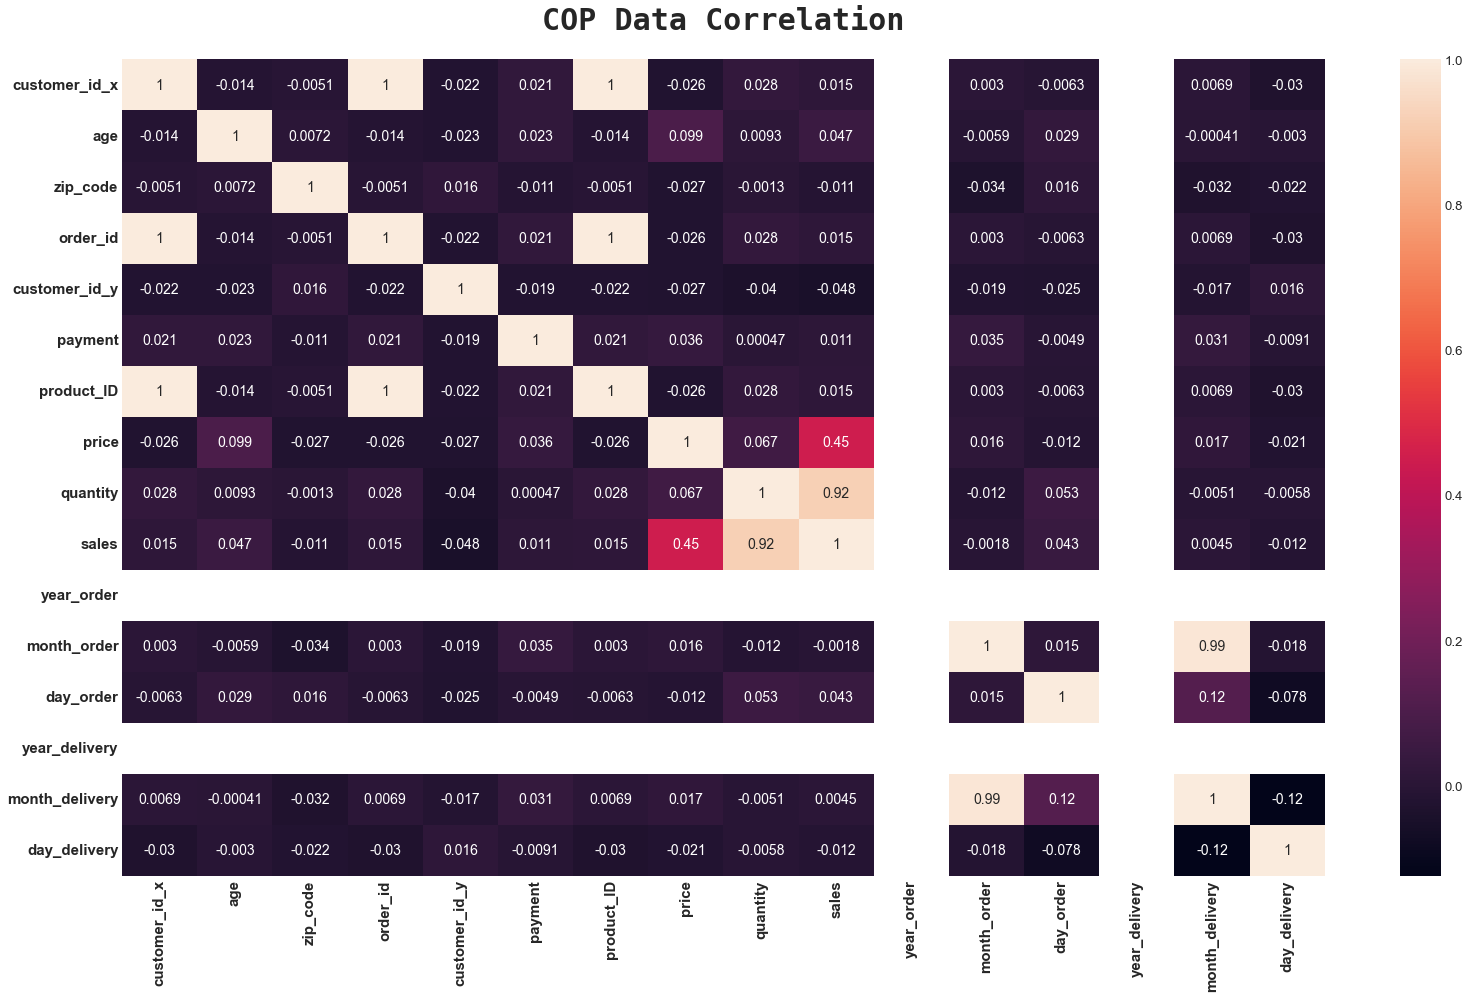

In [31]:
import os
import numpy as np
import seaborn as sns
import warnings
import  pandas as pd
from scipy import stats
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell
sns.set_style("whitegrid") # set the seaborn style

# let's make a correlation matrix for `cop_data`


 # figure the size
plt.figure(figsize=(24, 14))
# create a heatmap
sns.heatmap(cop_data.corr(), annot=True)
plt.title("COP Data Correlation", weight="bold", fontsize=30, fontname="monospace", pad=30)
plt.xticks(weight="bold", fontsize=15)
plt.yticks(weight="bold", fontsize=15);


In [32]:
# Let's see the correlation from `cop_data`
(cop_data.corr()["sales"] # transform it into data corr
         .sort_values(ascending=False) # sort values
         .to_frame() # change it into data frame
         .T) # transpose


,sales,quantity,price,age,day_order,customer_id_x,order_id,product_ID,payment,month_delivery,month_order,zip_code,day_delivery,customer_id_y,year_order,year_delivery
sales,1.0,0.918043,0.450207,0.047032,0.042621,0.015294,0.015294,0.015294,0.011012,0.00446,-0.001763,-0.010807,-0.012453,-0.047699,NaN,NaN


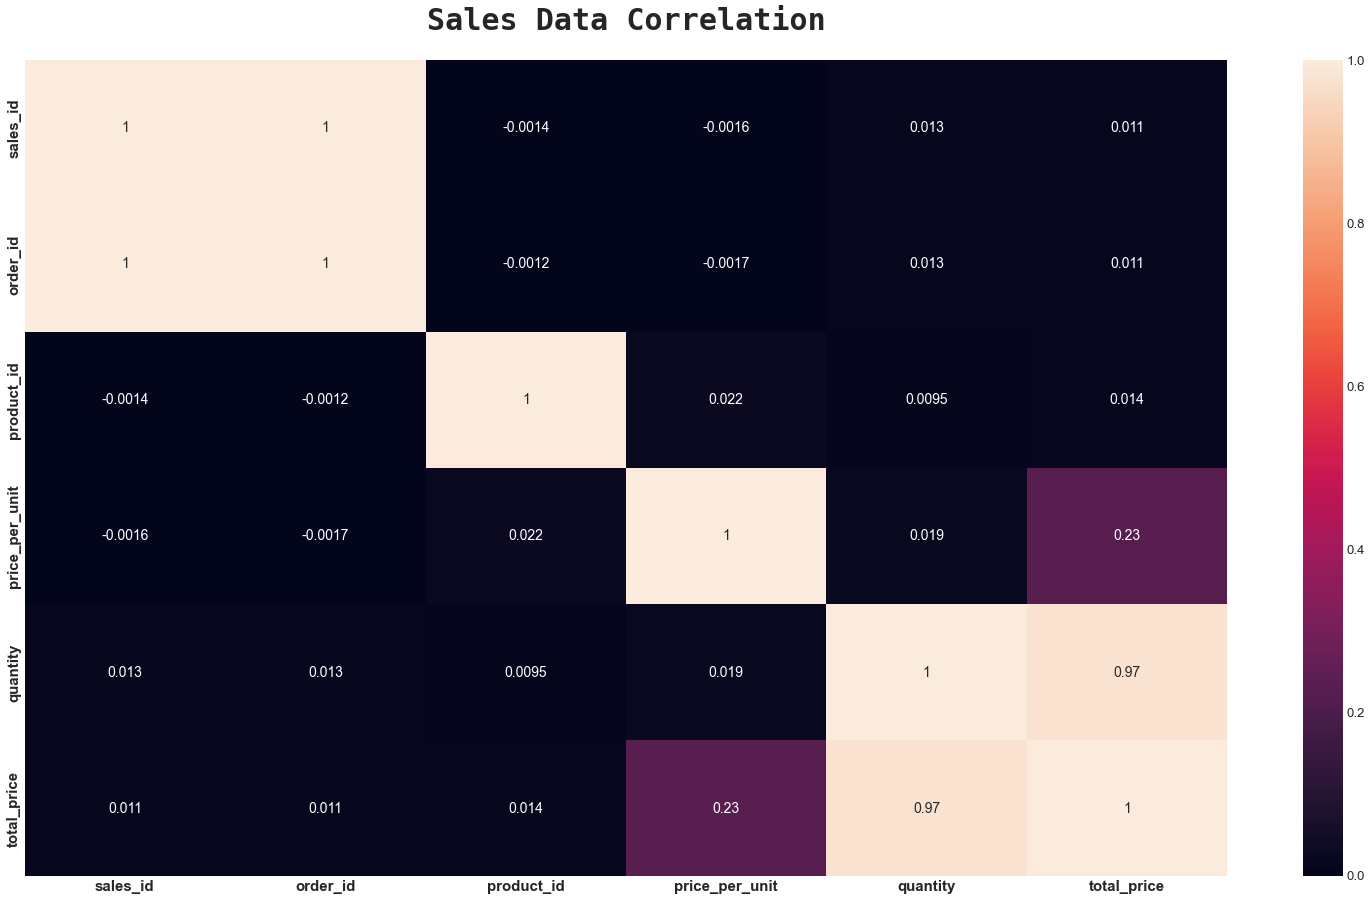

In [33]:
# let's make a correlation matrix for `sales`
plt.figure(figsize=(24, 14)) # figure the size
sns.heatmap(sales.corr(), annot=True) # construct the heatmap
plt.title("Sales Data Correlation", weight="bold", fontsize=30, fontname="monospace", pad=30) # title
plt.xticks(weight="bold", fontsize=15) # x-ticks
plt.yticks(weight="bold", fontsize=15); # y-ticks


In [34]:
# Let's see the correlation of the total sales
(sales.corr()["total_price"]
      .sort_values(ascending=False)
      .to_frame()
      .T) # transpose


,total_price,quantity,price_per_unit,product_id,order_id,sales_id
total_price,1.0,0.973141,0.232178,0.013958,0.011283,0.011228


Statistical Measure
Let's have a look to the statistical measure in both of data

In [35]:
# Let's have a look to the discrete and continuous data first
cop_data.describe(include=[np.number])


,customer_id_x,age,zip_code,order_id,customer_id_y,payment,product_ID,price,quantity,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,500.500000,49.860000,5004.872000,500.500000,506.640000,33972.936000,499.500000,108.095000,60.371000,6532.937000,2021.0,5.376000,15.562000,2021.0,5.841000,15.508000
std,288.819436,17.647828,2884.497332,288.819436,277.115502,14451.609047,288.819436,9.158048,11.606812,1408.645064,0.0,2.847584,8.614776,0.0,2.907606,8.636813
min,1.000000,20.000000,2.000000,1.000000,1.000000,10043.000000,0.000000,90.000000,40.000000,3690.000000,2021.0,1.000000,1.000000,2021.0,1.000000,1.000000
25%,250.750000,34.000000,2401.750000,250.750000,275.250000,21329.250000,249.750000,102.000000,50.000000,5405.000000,2021.0,3.000000,8.000000,2021.0,3.000000,8.000000
50%,500.500000,50.000000,5083.000000,500.500000,515.000000,33697.500000,499.500000,112.000000,61.000000,6454.000000,2021.0,5.000000,16.000000,2021.0,6.000000,15.000000
75%,750.250000,65.000000,7460.250000,750.250000,737.250000,46249.000000,749.250000,115.000000,70.000000,7656.750000,2021.0,8.000000,23.000000,2021.0,8.000000,23.000000
max,1000.000000,80.000000,9998.000000,1000.000000,1000.000000,59910.000000,999.000000,119.000000,80.000000,9520.000000,2021.0,10.000000,31.000000,2021.0,11.000000,31.000000


In [36]:
# Let's have a look to sales data
sales.describe(include=[np.number])

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [37]:
#let's have a look to the categorical type.
cop_data.describe(exclude=[np.number])

,customer_name,gender,home_address,city,state,country,order_date,delivery_date,product_type,product_name,size,colour,description
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,8,1000,961,8,1,291,305,3,28,5,7,1000
top,Leanna Busson,Male,8606 Victoria TerraceSuite 560,East Sophia,South Australia,Australia,2021-06-20 00:00:00,2021-08-09 00:00:00,Shirt,Denim,XS,red,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,1,143,1,3,139,1000,10,9,420,70,200,145,1
first,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-24 00:00:00,2021-11-20 00:00:00,NaN,NaN,NaN,NaN,NaN


In [38]:
cop_data.head(1)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30,2021,9,24


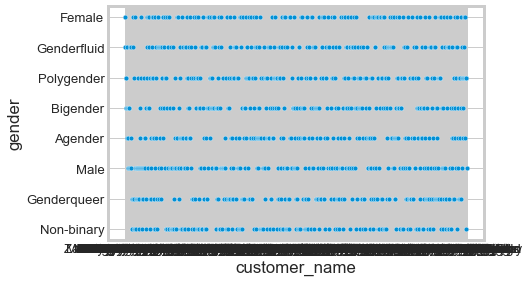

In [39]:
#let's visualize the costumer name and their gender
import csv
res = sns.scatterplot(x=cop_data["customer_name"], y=cop_data["gender"], data=csv)
plt.show()

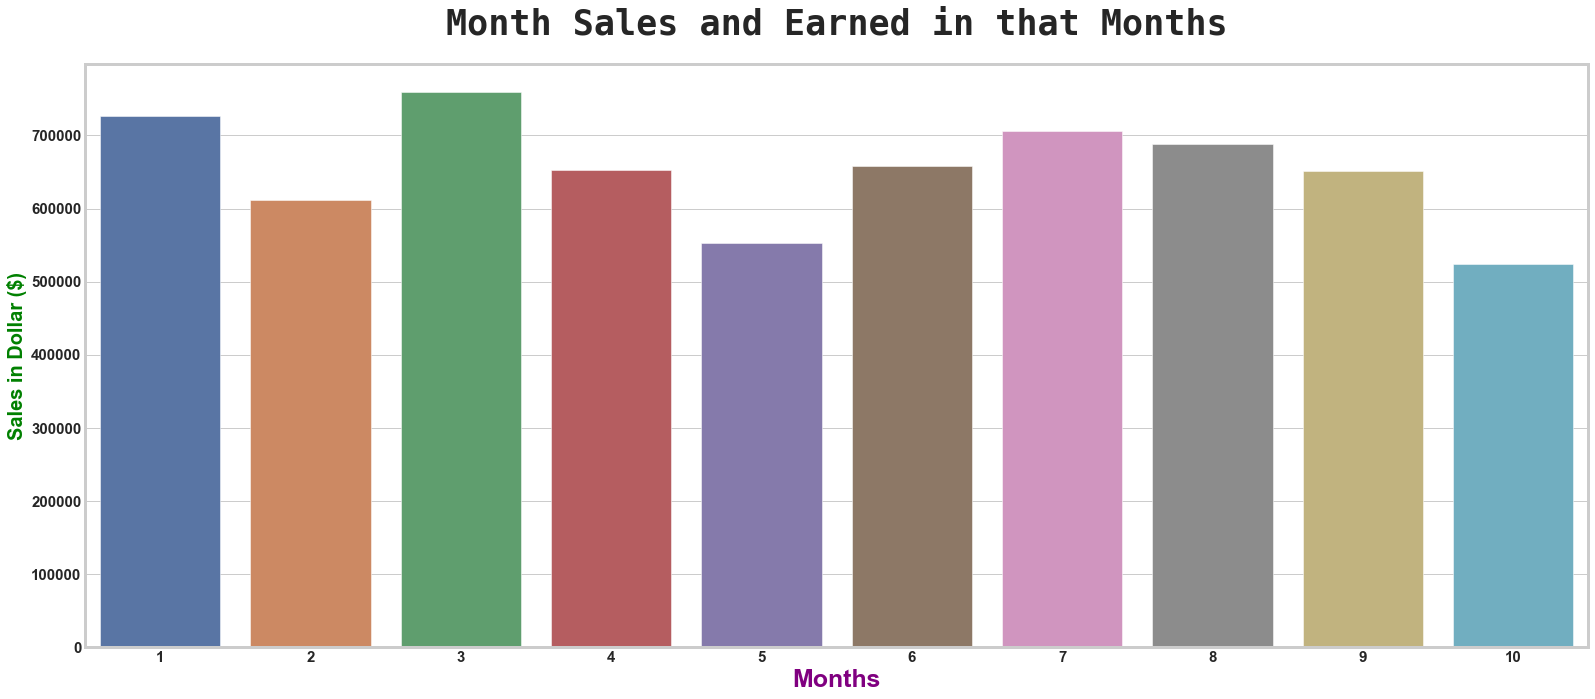

In [40]:
#have sales and revenue changed over the past few quarters
# group the Month cols
sum_month_order = cop_data.groupby(["month_order"]).sum().astype("int")
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes bar plot
sns.barplot(
    x=sum_month_order.index, # x-axis
    y=sum_month_order["sales"], # y-axis
    data=sum_month_order, # data
    palette="deep" # palette
)
# title
plt.title(
    "Month Sales and Earned in that Months",
    fontname="monospace", # fontname
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
# x-label
plt.xlabel(
    "Months",
    weight="bold",
    color="purple",
    fontsize=25,
    loc="center"
)
plt.xticks(
    weight="bold",
    fontsize=15
)
plt.ylabel(
    "Sales in Dollar ($)",
    weight="bold",
    color="green",
    fontsize=20
)
plt.yticks(
    weight="bold",
    fontsize=15
);

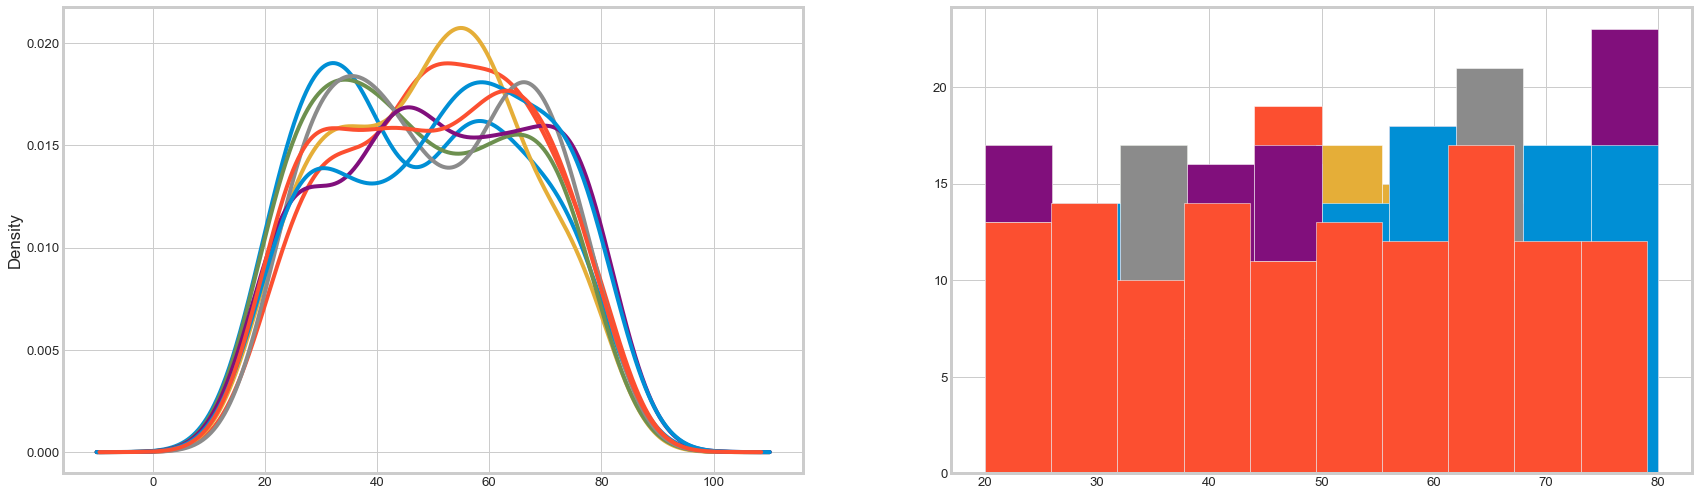

In [41]:
plt.figure(figsize=(26, 8)) # figure the size
plt.subplot(1, 2, 1) # make a subplots for making 2 visualization
cop_data.groupby("gender").age.plot(kind='kde'); # groupping gender and plot it
plt.subplot(1, 2, 2) # make a subplots for making 2 visualization
cop_data.groupby("gender").age.hist(); #

In [42]:
cop_data.head(1)


,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30,2021,9,24


Exploratory data analysis

<AxesSubplot:xlabel='gender', ylabel='Percent'>

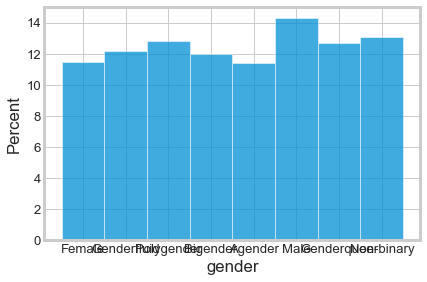

In [43]:
#count all the gender in the data file
sns.histplot(x=cop_data["gender"], stat="percent",data=csv)

let's find the overall sales trend

In [44]:
#which are the top 10 products by sales
#Grouping columns by product name
products_sales=pd.DataFrame(cop_data.groupby('product_name').sum()['sales'])

In [45]:
#sorting product  sales columns
products_sales.sort_values('sales',ascending=False)

,sales
product_name,
Denim,436218
Parka,261919
Leather,257188
Polo,256932
Slim-Fit,256445
Cords,255380
Dress,252875
Pullover,248976
Coach,248170


In [46]:
#top 10 products by sales
products_sales[:10]

,sales
product_name,
Bomber,187470
Camp Collared,231952
Cardigan,239776
Casual Slim Fit,235718
Chambray,212100
Chinos,210100
Coach,248170
Cords,255380
Cuban Collar,187581


which are the most selling products ?

In [47]:
#Grouping products by name
most_sell_products=pd.DataFrame(cop_data.groupby('product_name').sum()["quantity"])

In [48]:
most_sell_products=most_sell_products.sort_values('quantity',ascending=False)

In [49]:
most_sell_products[:10]

,quantity
product_name,
Denim,4204
Leather,2276
Cords,2260
Mandarin Collar,2203
Parka,2201
Polo,2196
Pullover,2184
Shearling,2169
Coach,2158


In [53]:
pd.DataFrame.to_csv(cop_data)


',customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery\r\n0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30,2021,9,24\r\n1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042,2021,2,3,2021,2,13\r\n2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,774,46763,2021-10-08,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, 

Let's do some data analysis on the overall data in mongoDB collections called sales

In [57]:
dbs

['admin', 'config', 'local', 'salesdb']

salesCollection=dbs.salesdb.sales
print(salesCollection)


In [4]:
mydb = client["salesdb"]
salescollection=mydb.sales
print(salescollection)


Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'salesdb'), 'sales')


In [4]:
#checking the collection names
addedCollection = mydb.list_collection_names()
if "sales" in addedCollection:
    print("Hey don't  WORRY sales  Collection is added successfully")
else:
    print("It seems like your collection hasn't been added")

Hey don't  WORRY sales  Collection is added successfully


In [66]:
# let's try to  add  only one omovies into the collection
newsales={"customer_id_x":16,"customer_name":"haithem Mihoubi Aldwinckle",
          "gender":"Male",
          "age":24,"home_address":"424 Mason PlaceApt. 181","zip_code":6438,"city":"New Kai","state":"Victoria","country":"Australia","order_id":16,"customer_id_y":564,
          "payment":36479,
          "order_date":{"$date":"2021-07-07T00:00:00.000Z"},
          "delivery_date":{"$date":"2021-07-08T00:00:00.000Z"},
          "product_ID":15,"product_type":"Shirt","product_name":"Oxford Cloth","size":"XS","colour":"green","price":114,"quantity":68,"description":"A green coloured, XS sized, Oxford Cloth Shirt","sales":7752,"year_order":2021,"month_order":7,"day_order":7,"year_delivery":2021,"month_delivery":7,"day_delivery":8}
salescollection.insert_one(newsales)


In [5]:
#find the  one sales in the year 2021

sales1 = salescollection.find_one({"year_delivery": 2021})
print(sales1)


{'_id': ObjectId('61c4fa14d91138c283de0204'), '': 0, 'customer_id_x': 1, 'customer_name': 'Leanna Busson', 'gender': 'Female', 'age': 30, 'home_address': '8606 Victoria TerraceSuite 560', 'zip_code': 5464, 'city': 'Johnstonhaven', 'state': 'Northern Territory', 'country': 'Australia', 'order_id': 1, 'customer_id_y': 64, 'payment': 30811, 'order_date': datetime.datetime(2021, 8, 30, 0, 0), 'delivery_date': datetime.datetime(2021, 9, 24, 0, 0), 'product_ID': 0, 'product_type': 'Shirt', 'product_name': 'Oxford Cloth', 'size': 'XS', 'colour': 'red', 'price': 114, 'quantity': 66, 'description': 'A red coloured, XS sized, Oxford Cloth Shirt', 'sales': 7524, 'year_order': 2021, 'month_order': 8, 'day_order': 30, 'year_delivery': 2021, 'month_delivery': 9, 'day_delivery': 24}


In [84]:
#find all the sales which has been delivered in 2021
sales_in_2021=salescollection.find({"year_delivery": 2021})
[sale for sale in sales_in_2021]


[{'_id': ObjectId('61c4fa14d91138c283de0204'),
  '': 0,
  'customer_id_x': 1,
  'customer_name': 'Leanna Busson',
  'gender': 'Female',
  'age': 30,
  'home_address': '8606 Victoria TerraceSuite 560',
  'zip_code': 5464,
  'city': 'Johnstonhaven',
  'state': 'Northern Territory',
  'country': 'Australia',
  'order_id': 1,
  'customer_id_y': 64,
  'payment': 30811,
  'order_date': datetime.datetime(2021, 8, 30, 0, 0),
  'delivery_date': datetime.datetime(2021, 9, 24, 0, 0),
  'product_ID': 0,
  'product_type': 'Shirt',
  'product_name': 'Oxford Cloth',
  'size': 'XS',
  'colour': 'red',
  'price': 114,
  'quantity': 66,
  'description': 'A red coloured, XS sized, Oxford Cloth Shirt',
  'sales': 7524,
  'year_order': 2021,
  'month_order': 8,
  'day_order': 30,
  'year_delivery': 2021,
  'month_delivery': 9,
  'day_delivery': 24},
 {'_id': ObjectId('61c4fa14d91138c283de0205'),
  '': 1,
  'customer_id_x': 2,
  'customer_name': 'Zabrina Harrowsmith',
  'gender': 'Genderfluid',
  'age': 69,

In [92]:
#  return all the customer_name without redundancy
customer_names = salescollection.distinct("customer_name")
print("all the customer names ")
list(iter([customer_names]))

all the customer names 


[['Abbot Rickaert',
  'Abey Bampforth',
  'Adair Ruddoch',
  'Adamo Saddington',
  'Adena Venn',
  'Adrianna Slack',
  'Aida Warsap',
  'Ailene McKeller',
  'Ailina Kynan',
  'Aimee Giorgio',
  'Aimil Rapa',
  'Aindrea Franzetti',
  'Alair Grimwad',
  'Alameda Fincke',
  'Alanson Colton',
  'Alayne Ipplett',
  'Albina Disdel',
  'Aldin Moline',
  'Aldridge Tesh',
  'Alexei Hurburt',
  'Alexis Cheake',
  'Alexis Maps',
  'Alfonse Shills',
  'Alfonso Locket',
  'Alia Rapinett',
  'Alicea Momford',
  'Alida Spitaro',
  'Alina Strotton',
  'Alis MacCulloch',
  'Allix Langdale',
  'Alon Abramsky',
  'Alphonse Galego',
  'Amaleta Beange',
  'Amalia Eallis',
  'Amberly Seckington',
  'Amelita Witterick',
  'Anders Couvert',
  'Anderson Bridywater',
  'Andi Kettleson',
  'Andonis Renfree',
  'Andrew Renn',
  'Andy McPhillimey',
  'Angela Kester',
  'Angelia Lasseter',
  'Angelle Huby',
  'Angie O Mullen',
  'Angil Crunden',
  'Ann-marie Sinden',
  'Annabela Wegenen',
  'Annabella Devote',
  'A

In [105]:
# find all the  customers that has ordered a quantity greater than 60
sales_quantity60=salescollection.find({"quantity": {'$gt': 20}})
print("the  customers that has ordered a quantity greater than 60    is  : \n")
[customer for customer in sales_quantity60]

the  customers that has ordered a quantity greater than 60    is  : 



[{'_id': ObjectId('61c4fa14d91138c283de0204'),
  '': 0,
  'customer_id_x': 1,
  'customer_name': 'Leanna Busson',
  'gender': 'Female',
  'age': 30,
  'home_address': '8606 Victoria TerraceSuite 560',
  'zip_code': 5464,
  'city': 'Johnstonhaven',
  'state': 'Northern Territory',
  'country': 'Australia',
  'order_id': 1,
  'customer_id_y': 64,
  'payment': 30811,
  'order_date': datetime.datetime(2021, 8, 30, 0, 0),
  'delivery_date': datetime.datetime(2021, 9, 24, 0, 0),
  'product_ID': 0,
  'product_type': 'Shirt',
  'product_name': 'Oxford Cloth',
  'size': 'XS',
  'colour': 'red',
  'price': 114,
  'quantity': 66,
  'description': 'A red coloured, XS sized, Oxford Cloth Shirt',
  'sales': 7524,
  'year_order': 2021,
  'month_order': 8,
  'day_order': 30,
  'year_delivery': 2021,
  'month_delivery': 9,
  'day_delivery': 24},
 {'_id': ObjectId('61c4fa14d91138c283de0205'),
  '': 1,
  'customer_id_x': 2,
  'customer_name': 'Zabrina Harrowsmith',
  'gender': 'Genderfluid',
  'age': 69,

In [110]:
# find all the sales  ordered  before 2022 on show the name of the customer and the country
ordered2022 = salescollection.find({"year_order": {"$lte": 2022}})
print("sales found ordered before 2022 \n ")

for order in ordered2022:
    print("**Name :",order['customer_name'],"*from  ",order['country'])

sales found ordered before 2022 
 
**Name : Leanna Busson *Country  Australia
**Name : Zabrina Harrowsmith *Country  Australia
**Name : Shina Dullaghan *Country  Australia
**Name : Hewet McVitie *Country  Australia
**Name : Rubia Ashleigh *Country  Australia
**Name : Cordey Tolcher *Country  Australia
**Name : Winslow Ewbanck *Country  Australia
**Name : Marlowe Wynn *Country  Australia
**Name : Brittaney Gontier *Country  Australia
**Name : Susanetta Wilshin *Country  Australia
**Name : Michaeline McIndrew *Country  Australia
**Name : Fedora Dmych *Country  Australia
**Name : Marabel Swinfon *Country  Australia
**Name : Chrissie Wackly *Country  Australia
**Name : Avril Rossiter *Country  Australia
**Name : Gabbie Aldwinckle *Country  Australia
**Name : Devonna Cutting *Country  Australia
**Name : Chan Duchesne *Country  Australia
**Name : Chadwick Cruddas *Country  Australia
**Name : Gigi Kalaher *Country  Australia
**Name : Seana Hearons *Country  Australia
**Name : Blayne Sabatier 

In [114]:
# find all the sales that has been delivred  in 2019 and 2020 showing just the customers name
sales = salescollection.find({"year_delivery": {"$in": [2019, 2021]}})
print("sales delivered  in 2019 and 2020")
for sale in sales:
    print("for ",sale['customer_name'])

sales delivered  in 2019 and 2020
for  Leanna Busson
for  Zabrina Harrowsmith
for  Shina Dullaghan
for  Hewet McVitie
for  Rubia Ashleigh
for  Cordey Tolcher
for  Winslow Ewbanck
for  Marlowe Wynn
for  Brittaney Gontier
for  Susanetta Wilshin
for  Michaeline McIndrew
for  Fedora Dmych
for  Marabel Swinfon
for  Chrissie Wackly
for  Avril Rossiter
for  Gabbie Aldwinckle
for  Devonna Cutting
for  Chan Duchesne
for  Chadwick Cruddas
for  Gigi Kalaher
for  Seana Hearons
for  Blayne Sabatier
for  Alair Grimwad
for  Rici Fogden
for  Ernaline Luce
for  Timothy Compston
for  Jayme Turvie
for  Hadley Baddam
for  Tyrus Pitkaithly
for  Bernice Grindle
for  Tammara Dionisetti
for  Devlin Labet
for  Luca Hantusch
for  Ninon Corteney
for  Adamo Saddington
for  Xever Giacomelli
for  Zulema Teml
for  Joly Hagley
for  Legra Neaverson
for  Regan Gronaller
for  Hana Stitch
for  Horatius Genever
for  Rodie Klaiser
for  Avivah Chipchase
for  Vicki Stockwell
for  Meris Twitty
for  Jarrett Brumby
for  Ronnie 

In [122]:
#find all the sales where the quantity is greate than 20 of the products where the type is Shirt
salesgt100=salescollection.find({"quantity":{"$gte":20},"product_type":"Shirt"})
for sale in salesgt100:
    print(sale['customer_name'])


Leanna Busson
Zabrina Harrowsmith
Shina Dullaghan
Hewet McVitie
Rubia Ashleigh
Cordey Tolcher
Winslow Ewbanck
Marlowe Wynn
Brittaney Gontier
Susanetta Wilshin
Michaeline McIndrew
Fedora Dmych
Marabel Swinfon
Chrissie Wackly
Avril Rossiter
Gabbie Aldwinckle
Devonna Cutting
Chan Duchesne
Chadwick Cruddas
Gigi Kalaher
Seana Hearons
Blayne Sabatier
Alair Grimwad
Rici Fogden
Ernaline Luce
Timothy Compston
Jayme Turvie
Hadley Baddam
Tyrus Pitkaithly
Bernice Grindle
Tammara Dionisetti
Devlin Labet
Luca Hantusch
Ninon Corteney
Adamo Saddington
Xever Giacomelli
Zulema Teml
Joly Hagley
Legra Neaverson
Regan Gronaller
Hana Stitch
Horatius Genever
Rodie Klaiser
Avivah Chipchase
Vicki Stockwell
Meris Twitty
Jarrett Brumby
Ronnie Shiril
Shanna Pietrzyk
Moore Oolahan
Kayley Brosoli
Marena Lockhart
Reinhold Gooble
Tore Caras
Giles Kyne
Vinny Niland
Anne-corinne Enrich
Aurie Margett
Martita Quakley
Hyacinth Pepper
Lin Avraam
Denice Ledrane
Kleon Trobey
Annabella Devote
Bertine Puddefoot
Vasili Shearsto

In [124]:
#find all the customers
# that aged  is 20 years old and order
# year is 2021  and  the month of delivery is the 9
salesgt2021=salescollection.find({"age":{"$gte":20},"year_order":2021,"month_delivery":9})
for sale in salesgt2021:
    print(sale["customer_name"])

Leanna Busson
Chadwick Cruddas
Rici Fogden
Hadley Baddam
Adamo Saddington
Xever Giacomelli
Avivah Chipchase
Moore Oolahan
Katinka Currier
Minta Loble
Keen Murrhaupt
Benji Vineall
Giralda Trewin
Cecile Jayume
Stephanus Torbett
Camala Bradbeer
Jewelle Gatiss
Lawry Mannooch
Lucie Lyenyng
Marga Longhurst
Melania Murton
Mariellen Medendorp
Wake Guard
Holden Whybrow
Yevette Weekes
Melba Badam
Brade Caught
Karl Ramsell
Bourke Pembery
Beverlie Blance
Aimee Giorgio
Faunie Cooney
Scot Billany
Bartlet Whiffin
Lionel Mansel
Jaymee Dalrymple
Flss Jillins
Roobbie Persich
De Lourens
Sadella Goodsall
Royall Lowrie
Dani Pinches
Jacynth Stillmann
Tymothy Linsay
Archaimbaud Barnewelle
Mady Greenleaf
Etan Peirazzi
Nathanil Runchman
Eba Bauser
Kimberli Canavan
Luelle Fernanando
Candis Roswarne
Meredith Canniffe
Fifine Baron
Daren Airs
Mallory Dillinton
Clem Margetts
Laurent St. Paul
Isahella Enrique
Bank Sargeaunt
Vinni Itzkovich
Eddie Elcott
Preston Nehlsen
Dedra Traite
Maiga Jeffcoate
Fanchette Polak
The

In [128]:
#find the customer and the description of sales which has the following conditions :
# the month delivery is July
# the size of the shirts ordered is XS or S
# the sales are greater than 10
# the price is greater than 100

try:
    documentreturned = salescollection.aggregate([{
        "$match": {
            "month_delivery": {"$gte": 7},
            "size": {"$in": ["XS", "S"]},
            "$and": [
                {"sales": {"$gt":10}},
                {"price": {"$gte":100}}]
        }}, {
        "$project": {
            "_id": 0,
            "customer_name": 1,
            "description": 1
        }
    }])
    i = 0
    for sale in documentreturned:
        i = i + 1
        jsonsales = json.dumps(sale)
        docSale = json.loads(jsonsales)
        print("THE Sale NUMBER  ", i, " Customer name = ", docSale['customer_name'], " description ", docSale['description'])

except BaseException as e:
    print("exception", e)
finally:
    print("THIS IS THE END OF THE OPERATION  ")

THE Sale NUMBER   1  Customer name =  Leanna Busson  description  A red coloured, XS sized, Oxford Cloth Shirt
THE Sale NUMBER   2  Customer name =  Cordey Tolcher  description  A orange coloured, XS sized, Oxford Cloth Shirt
THE Sale NUMBER   3  Customer name =  Fedora Dmych  description  A yellow coloured, S sized, Oxford Cloth Shirt
THE Sale NUMBER   4  Customer name =  Gabbie Aldwinckle  description  A green coloured, XS sized, Oxford Cloth Shirt
THE Sale NUMBER   5  Customer name =  Devlin Labet  description  A violet coloured, S sized, Oxford Cloth Shirt
THE Sale NUMBER   6  Customer name =  Xever Giacomelli  description  A red coloured, XS sized, Dress Shirt
THE Sale NUMBER   7  Customer name =  Zulema Teml  description  A red coloured, S sized, Dress Shirt
THE Sale NUMBER   8  Customer name =  Horatius Genever  description  A orange coloured, S sized, Dress Shirt
THE Sale NUMBER   9  Customer name =  Meris Twitty  description  A yellow coloured, XS sized, Dress Shirt
THE Sale N

In [6]:
#find the customer which has the following conditions :
# the month delivery is July
# the size of the shirts ordered is M and yellow color
try:
    documentreturned = salescollection.aggregate([{
        "$match": {
            "month_delivery": {"$gte": 7},
            "colour":"yellow",
          "gender":"Male" ,
            "size":"M" ,
            "product_type":"Shirt"
        }}, {
        "$project": {
            "_id": 0,
            "customer_name": 1,

        }
    }])
    i = 0
    for sale in documentreturned:
        i = i + 1
        jsonsales = json.dumps(sale)
        docSale = json.loads(jsonsales)
        print("THE Sale NUMBER  ", i, " Customer name = ", docSale['customer_name'])

except BaseException as e:
    print("exception", e)
finally:
    print("THIS IS THE END OF THE OPERATION  ")

THE Sale NUMBER   1  Customer name =  Marabel Swinfon
THE Sale NUMBER   2  Customer name =  Kat Champness
THIS IS THE END OF THE OPERATION  


In [8]:
#let's find which is the most gender who byes from the store

try:
    agg=salescollection.aggregate([
  {
    "$group": {
      "_id": {
        "__alias_0": "$gender"
      },
      "__alias_1": {
        "$sum": {
          "$cond": [
            {
              "$ne": [
                {
                  "$type": "$age"
                },
                "missing"
              ]
            },
            1,
            0
          ]
        }
      }
    }
  },
  {
    "$project": {
      "_id": 0,
      "__alias_0": "$_id.__alias_0",
      "__alias_1": 1
    }
  },
  {
    "$project": {
      "x": "$__alias_1",
      "y": "$__alias_0",
      "_id": 0
    }
  },
  {
    "$addFields": {
      "__agg_sum": {
        "$sum": [
          "$x"
        ]
      }
    }
  },
  {
    "$sort": {
      "__agg_sum": -1
    }
  },
  {
    "$project": {
      "__agg_sum": 0
    }
  },
  {
    "$limit": 5000
  }
])
    i = 0
    for gender in agg:
        i = i + 1
        jsonsales = json.dumps(gender)
        docSale = json.loads(jsonsales)
        print("", i, " we have  = ", docSale['x'] ,'of gender ',docSale['y'] ,)

except BaseException as e:
    print("exception", e)
finally:
    print("THIS IS THE END OF THE OPERATION  ")

 1  we have  =  144 of gender  Male
 2  we have  =  131 of gender  Non-binary
 3  we have  =  128 of gender  Polygender
 4  we have  =  127 of gender  Genderqueer
 5  we have  =  122 of gender  Genderfluid
 6  we have  =  120 of gender  Bigender
 7  we have  =  115 of gender  Female
 8  we have  =  114 of gender  Agender
THIS IS THE END OF THE OPERATION  


The top-selling items

In [10]:
try:
    agg=salescollection.aggregate([
  {
    "$match": {
      "product_type": {
        "$nin": []
      }
    }
  },
  {
    "$group": {
      "_id": {
        "__alias_0": "$product_name"
      },
      "__alias_1": {
        "$sum": "$quantity"
      }
    }
  },
  {
    "$project": {
      "_id": 0,
      "__alias_0": "$_id.__alias_0",
      "__alias_1": 1
    }
  },
  {
    "$project": {
      "product_name": "$__alias_0",
      "count_of_products": "$__alias_1",
      "_id": 0
    }
  },
  {
    "$sort": {
      "x": 1
    }
  },
  {
    "$limit": 5000
  }
])
    i = 0
    print(" The top selling products in the store")
    for gender in agg:
        i = i + 1
        jsonsales = json.dumps(gender)
        docSale = json.loads(jsonsales)
        print(i, docSale['product_name'] ,'with  ',docSale['count_of_products'] ,"item sold")

except BaseException as e:
    print("exception", e)

 The top selling products in the store
1 Chambray with   2020 item sold
2 Mandarin Collar with   2203 item sold
3 Camp Collared with   2071 item sold
4 Trench Coat with   2132 item sold
5 Drawstring with   2042 item sold
6 Cuban Collar with   2017 item sold
7 Casual Slim Fit with   2086 item sold
8 Shearling with   2169 item sold
9 Leather with   2276 item sold
10 Cords with   2260 item sold
11 Henley with   2051 item sold
12 Dress with   2125 item sold
13 Cardigan with   2032 item sold
14 Wool with   1163 item sold
15 Bomber with   2083 item sold
16 Linen with   2138 item sold
17 Windbreaker with   2085 item sold
18 Denim with   4204 item sold
19 Coach with   2158 item sold
20 Slim-Fit with   2155 item sold
21 Polo with   2196 item sold
22 Parka with   2201 item sold
23 Flannel with   2135 item sold
24 Pullover with   2184 item sold
25 Oxford Cloth with   2139 item sold
26 Puffer with   1946 item sold
27 Chinos with   2101 item sold
28 Peacoat with   2067 item sold


The sto decide to give presents to the top 5 customer who buys always from our store which is 30 % on the next items

IndentationError: unexpected indent (Temp/ipykernel_13076/2800675429.py, line 2)

In [19]:
 try:
    agg = salescollection.aggregate([


  {
    "$group": {
      "_id": {
        "__alias_0": "$customer_name"
      },
      "__alias_1": {
        "$sum": "$payment"
      }
    }
  },
  {
    "$project": {
      "_id": 0,
      "__alias_0": "$_id.__alias_0",
      "__alias_1": 1
    }
  },
  {
    "$project": {
      "customer_name": "$__alias_0",
      "sum_payments": "$__alias_1",
      "_id": 0
    }
  },
  {
    "$addFields": {
      "__agg_sum": {
        "$sum": [
          "$y"
        ]
      }
    }
  },
  {
    "$sort": {
      "__agg_sum": -1
    }
  },
  
])
    i = 0
    print("The top 5 loyal customers are  ")
    for gender in agg:
        i = i + 1
        jsonsales = json.dumps(gender)
        docSale = json.loads(jsonsales)
        print(i, docSale['customer_name'], 'with  ', docSale['sum_payments'], "$")
        if i==5 :
            break

except BaseException as e:
    print("exception", e)

The top 5 loyal customers are  
1 Daniel Najafian with   30197 $
2 Henryetta Sheffield with   19171 $
3 Diann Grieger with   26168 $
4 Jojo Toffanini with   51003 $
5 Angil Crunden with   40129 $
